<a href="https://colab.research.google.com/github/andrehochuli/teaching/blob/main/DataStructuresAndAlgorithms/Lecture%2006%20-%20Graphs%20-%20Max%20Flow/Lecture_06_Ford_Fulkerson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from collections import defaultdict

class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = defaultdict(dict)

    def add_edge(self, u, v, w):
        self.graph[u][v] = w
        if v not in self.graph or u not in self.graph[v]:
            self.graph[v][u] = 0  # Aresta reversa inicial

    # Busca em profundidade para encontrar caminho aumentante
    def dfs(self, s, t, visited, path):
        if s == t:
            return path
        visited[s] = True
        for v in self.graph[s]:
            if not visited[v] and self.graph[s][v] > 0:
                res_path = self.dfs(v, t, visited, path + [(s, v)])
                if res_path is not None:
                    return res_path
        return None

    def ford_fulkerson(self, source, sink):
        max_flow = 0
        while True:
            visited = [False] * self.V
            path = self.dfs(source, sink, visited, [])
            if not path:
                break
            # Encontrar capacidade mínima do caminho (gargalo)
            flow = min(self.graph[u][v] for u, v in path)
            # Atualizar capacidades
            for u, v in path:
                self.graph[u][v] -= flow
                self.graph[v][u] += flow
            max_flow += flow
        return max_flow

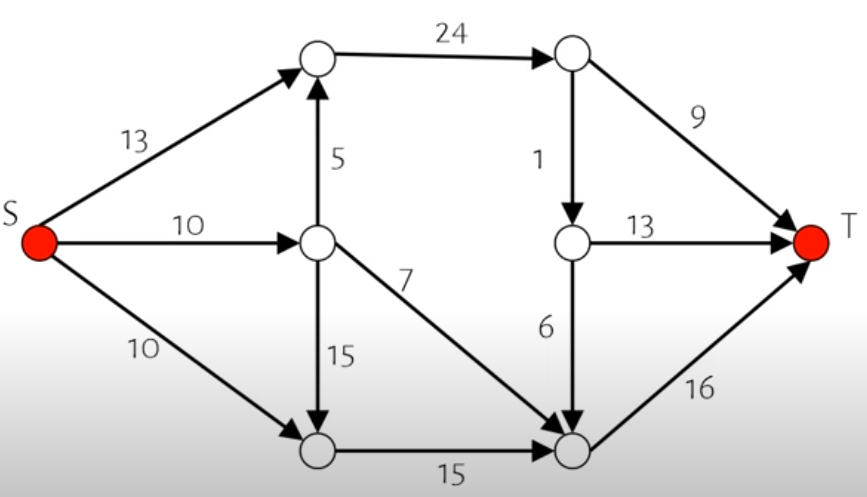

In [10]:
g = Graph(8)  # 6 nós: S=0, T=5, outros = 1..4

#Define Graph
g.add_edge(0, 1, 13)
g.add_edge(0, 2, 10)
g.add_edge(0, 3, 10)

g.add_edge(1, 4, 24)

g.add_edge(2, 1, 5)
g.add_edge(2, 3, 15)
g.add_edge(2, 6, 7)

g.add_edge(3, 6, 15)

g.add_edge(4, 7, 9)
g.add_edge(4, 5, 1)

g.add_edge(5, 7, 13)
g.add_edge(5, 6, 6)

g.add_edge(6, 7, 16)

max_flux = g.ford_fulkerson(0,7)

print(max_flux)

26
